# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

### a. Problem Statement
  The executives at E-news Express are concerned that there has been a decline in new monthly subscribers for their online e-news portal as compared to the past year. This, they are attributing to the current webpage that they presume is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe. As such, a new landing page that has a new outline & more relevant content shown compared to the old page was created.

### b. Objective

The objective is to explore data that was collected regarding the interaction of users  with the two versions of the landing pages and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [6]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
abtest = pd.read_csv("abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

### a. Data Overview

#### i. Viewing the first and last few rows of the dataset

In [3]:
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
abtest.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


_Observation_ : The first five and last five rows show that the dataset contains both numeric and categorical data in six columns

#### ii. Checking the shape of the data

In [5]:
abtest.shape

(100, 6)

_Observation_ : There are 100 rows and 6 columns. This is consistent with the number of observations made

#### iii. Getting the statistical summary of the variables

In [6]:
abtest.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Observation_ : 
* Time_spent_on_page: Has a mean of 5.37 which is almost the same as the median time of 5.41. The minimum time spent is 0.19 minutes with the maximum being 10.71minutes
* Converted: The most number of users who converted is 54 out of 100
* language_preferred: There are three language preferences with Spanish being the most prefered with 34 users

### b. Checking for Missing Values

#### i. Getting data types and non null count

In [7]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


_Observation_ 
* All variables have a non null count of 100 implying no missing values
* Four of the variables (group, landing_page, converted and language_preferred) are categorical while two are numerical
* The dataset has very low memory consumption at 4.8+ KB

#### ii. Checking missing values

In [8]:
abtest.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

_Observation_ : All variables have 0 count for NA. Therefore there are no missing values

### c. Check for duplicates

In [9]:
duplicate_rows = abtest[abtest.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


_Observation_ : There are no duplicated values

### Univariate Analysis

### a. group

In [10]:
abtest.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

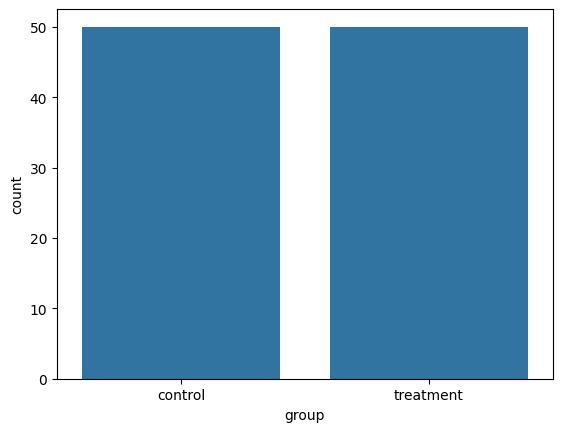

In [11]:
sns.countplot(data=abtest, x='group')
plt.show()

_Observation_ : There is an equal number of group observations which is 50

### b. landing_page 

In [12]:
abtest.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

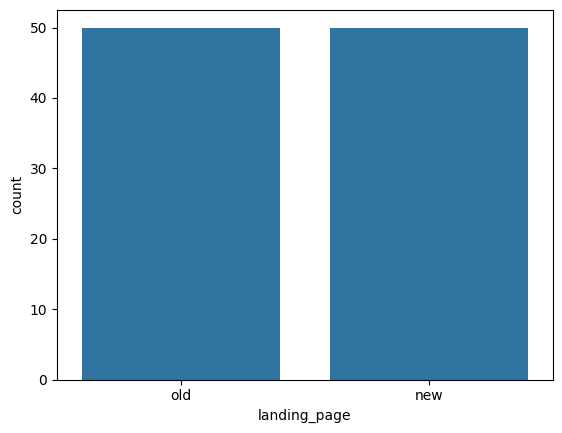

In [13]:
sns.countplot(data=abtest, x='landing_page')
plt.show()

_Observation_ : The same number of users landed on the old page as much as on the new page

### c. time_spent_on_the_page

Text(0.5, 1.0, 'Box Plot')

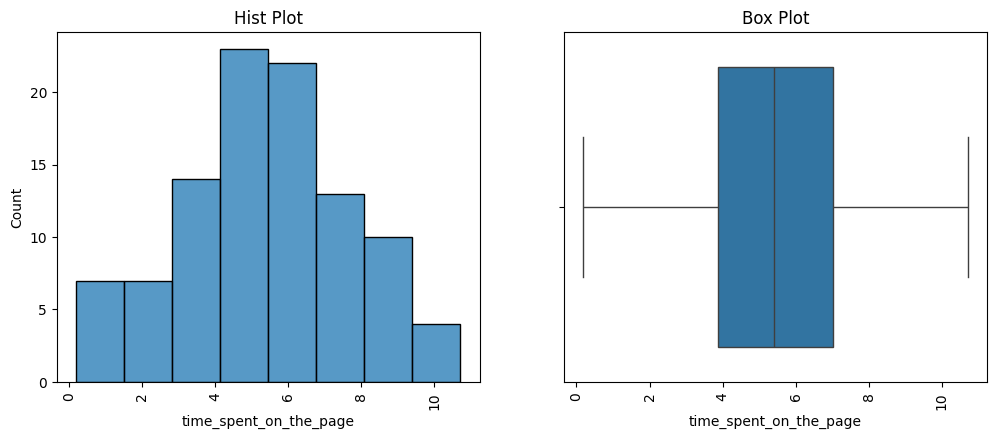

In [14]:
plt.figure(figsize=(12, 10))

# histplot for time spent on page
plt.subplot(2, 2, 1)
sns.histplot(data=abtest, x="time_spent_on_the_page")
plt.xticks(rotation=90)
plt.title('Hist Plot')
# boxplot for time spent on page
plt.subplot(2, 2, 2)
sns.boxplot(data=abtest, x="time_spent_on_the_page")
plt.xticks(rotation=90)
plt.title('Box Plot')


_Observation_ 
* The time spent on a page is approximately normally distributed with no skew and outliers
* 50% of the users spent between 4 and 7 minutes on a page

### d. converted

In [15]:
abtest.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

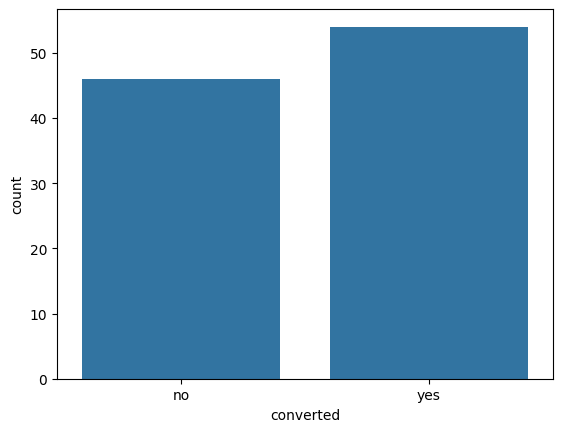

In [16]:
sns.countplot(data=abtest, x='converted')
plt.show()

_Observation_ : The total number of those converted is slightly higher than that of those users who did not convert by 8users

### e. language_preferred

In [17]:
abtest.language_preferred.nunique()

3

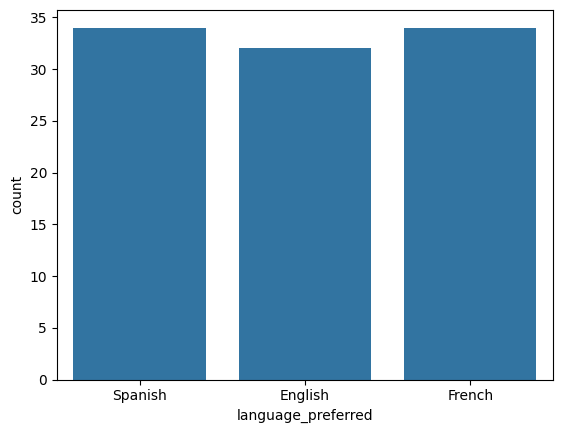

In [18]:
sns.countplot(data=abtest, x='language_preferred')
plt.show()

_Observation_ : 
* The are three language preferences which are almost evenly distributed among the users
* Spanish and French have the same number of users (34) while English is slightly lagging behind with 32

### Bivariate Analysis

### a. time spent on landing page vs other variables

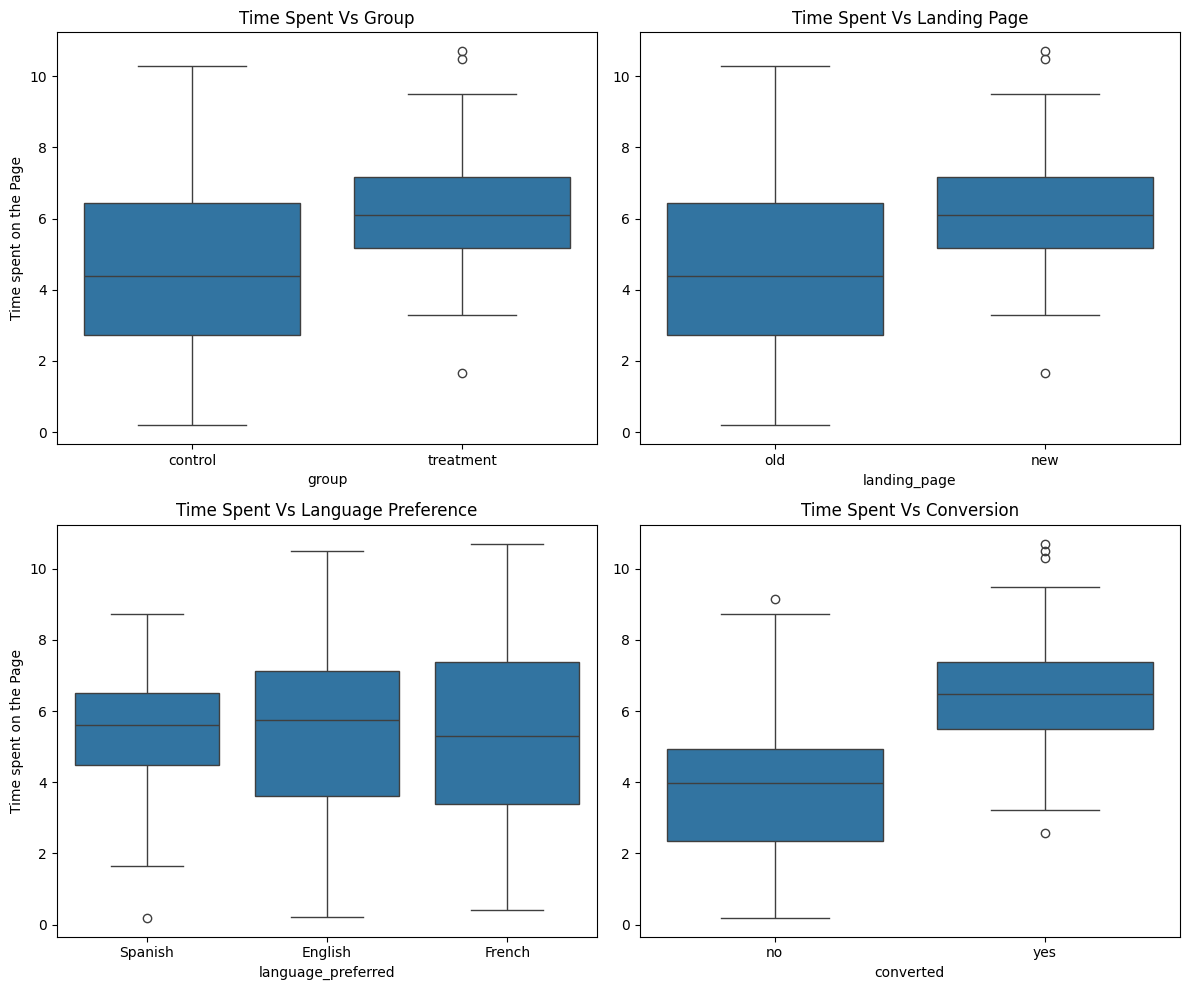

In [19]:
plt.figure(figsize=(12, 10))

# boxplot for group vs. time_spent_on_the_page
plt.subplot(2, 2, 1)
sns.boxplot(x='group', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent Vs Group')
plt.ylabel("Time spent on the Page")


# boxplot for landing_page vs. time_spent_on_the_page
plt.subplot(2, 2, 2)
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent Vs Landing Page')
plt.ylabel("")

# boxplot for language_preferred vs. time_spent_on_the_page
plt.subplot(2, 2, 3)
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent Vs Language Preference')
plt.ylabel("Time spent on the Page")

# boxplot for converted vs. time_spent_on_the_page
plt.subplot(2, 2, 4)
sns.boxplot(x='converted', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent Vs Conversion')
plt.ylabel("")

plt.tight_layout()
plt.show()

_Observations_ :
* The average time spent on the landing page by the treatment group on the new landing page is higher (approximately 6minutes) than that of the control group (approximately 4.5). However, the range of time spent on the landing page is wider for the control group than that for the treatment group. 
* All language preferences have almost similar average time spent on the landing page (between 5 and 6 minutes). However English and French speakers have a wider range of time they spend there.
* The average amount of time spent on a page is significantly higher (above 6 minutes) for the users who convert than that of users who do not convert (4minutes). The minimum and maximum times spent are also significantly higher

### b. Language Prefered vs Other Variables

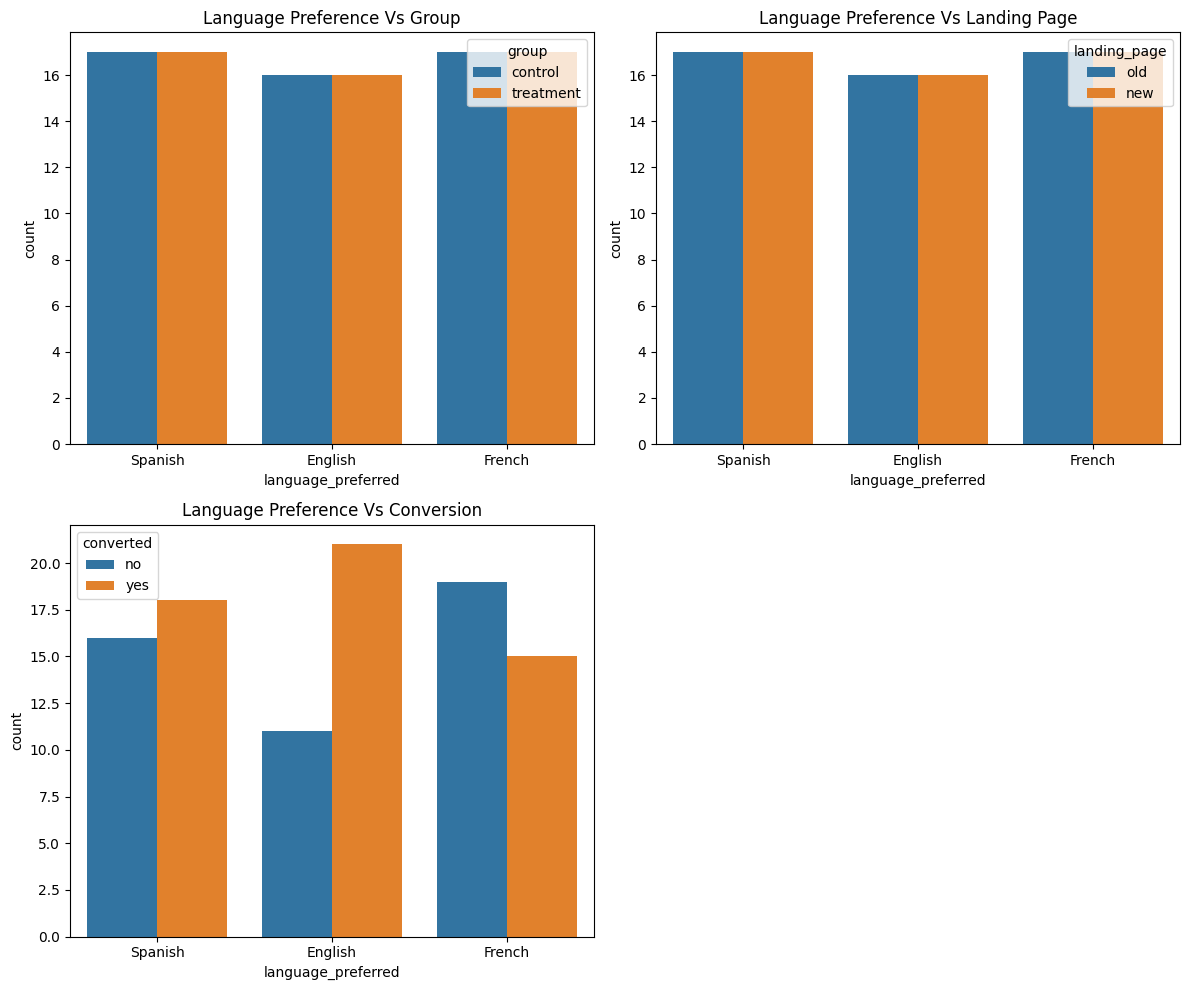

In [20]:
plt.figure(figsize=(12, 10))

# countplot for group vs. language
plt.subplot(2, 2, 1)
sns.countplot(x='language_preferred',  hue="group", data=abtest)
plt.title('Language Preference Vs Group')


# countplot for landing_page vs. language
plt.subplot(2, 2, 2)
sns.countplot(x='language_preferred',  hue="landing_page", data=abtest)
plt.title('Language Preference Vs Landing Page')

# countplot for converted vs. language
plt.subplot(2, 2, 3)
sns.countplot(x='language_preferred',  hue="converted", data=abtest)
plt.title('Language Preference Vs Conversion')

plt.tight_layout()
plt.show()

_Observations_ 
* Language preferences between the groups and landing pages are evenly distributed as observed by the same number across the different categories.
* Users with a preference for English have the highest conversion rate, followed by French and lastly Spanish 

### c. Converted vs Other Variables

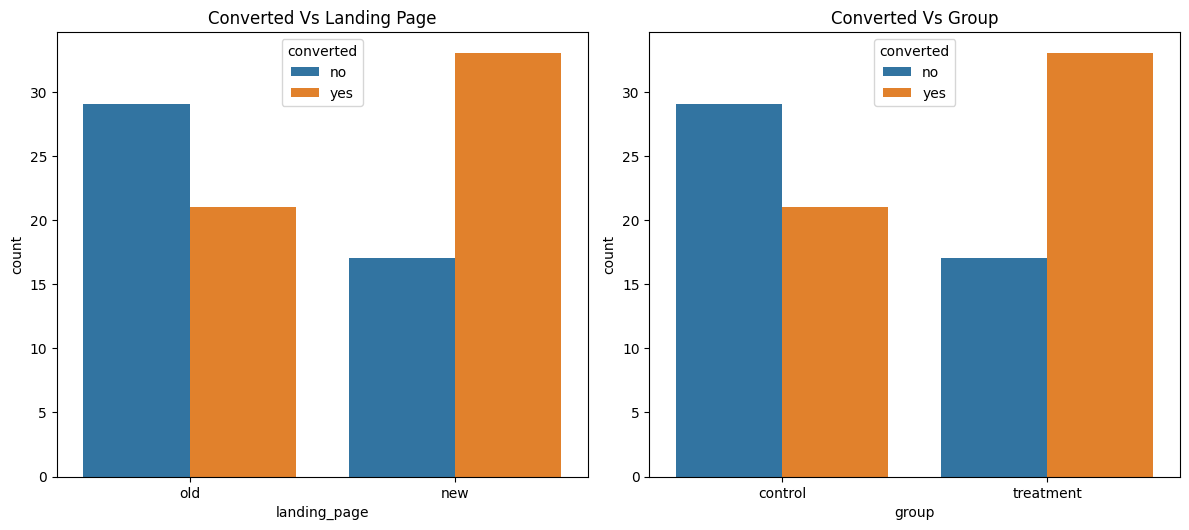

In [21]:
plt.figure(figsize=(12, 10))

# countplot for landing_page vs. converted

plt.subplot(2, 2, 1)
sns.countplot(  x="landing_page", hue="converted", data=abtest)
plt.title('Converted Vs Landing Page')

# countplot for group vs. converted
plt.subplot(2, 2, 2)
sns.countplot(  x="group", hue="converted", data=abtest)
plt.title('Converted Vs Group')

plt.tight_layout()
plt.show()

_Observation_ : The new landing page (composed of the treatment group) , has the highest number converted (above 30) and ultimately highest conversion rate

# Key Insights Based on Exploratory Data Analysis
* The distributions of the three language preferences is even between the two groups of Control and Treatment. This gives each member an equal chance
* Time spent on a landing page is approximately normally distributed
* The average time spent on a landing page is higher for the new page than it is for the old page.
* The average time spent on a landing page is higher for those who converted than those who did not convert.
* The English language preference has the highest number converted and the highest conversion rate.
* The new page has higher number converted and higher conversion rate than the old page


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

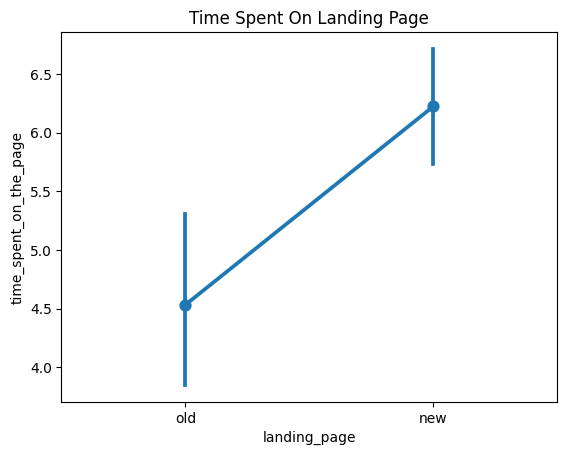

In [22]:
# pointplot for landing_page vs. time_spent_on_the_page
sns.pointplot(x='landing_page', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent On Landing Page')
plt.show()

_Observation_ : On average time spent on old page is shorter (4.5minutes) than time spent on new page (about 6.2minutes)

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on old landing page and mean time spent on new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

### Step 2: Select Appropriate test

Since this is a test for equality of means between two independent populations with population standard deviation unknown we can assume the Two Independent Sample T-test for Equality of Means
### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on landing page is measured on a continuous scale.
* Normally distributed populations - Yes, from the EDA, it has been observed that the time spent is normally distributed, thus can be assumed for the populations as well.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Unknown population standard deviations - the population standard deviations are not known. 
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

The significance level has been provided in the problem statement, we use $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [23]:
# find the sample means and sample standard deviations for the two samples
time_on_old = abtest[abtest['landing_page']=="old"]["time_spent_on_the_page"]
time_on_new = abtest[abtest['landing_page']=="new"]["time_spent_on_the_page"]
print('The mean time spent on the old page is ' + str(time_on_old.mean()))
print('The mean time spent on the new page is ' + str(time_on_new.mean()))
print('The standard deviation of time spent on the old page is ' + str(round(time_on_old.std(), 2)))
print('The standard deviation of time spent on the new page is ' + str(round(time_on_new.std(), 2)))

The mean time spent on the old page is 4.532400000000001
The mean time spent on the new page is 6.2232
The standard deviation of time spent on the old page is 2.58
The standard deviation of time spent on the new page is 1.82


### Step 5: Calculate the p-value

As the sample standard deviations are different, the population standard deviations may be assumed to be different.

In [24]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_on_old, time_on_new, equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [25]:
if (p_value > 0.05):
    print("The p-value {} is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis".format(p_value))
else:
    print("The p-value {0} is lower than the alpha 0.05. Therefore we reject the null hypothesis".format(p_value))

The p-value 0.0001392381225166549 is lower than the alpha 0.05. Therefore we reject the null hypothesis


### Step 7:  Draw inference

As the p-value is lower than the $\alpha$ at 5% level of significance, we reject the Null Hypothesis and conclude that we have gathered enough statistical evidence to show that the users spend more time on the new page than the exisiting landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [26]:
#Lets prepare the data
pd.crosstab(abtest["landing_page"],abtest["converted"],normalize='index')

converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


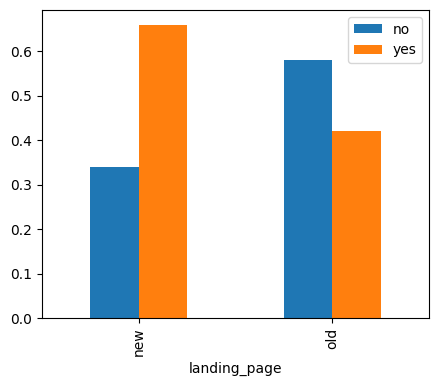

In [27]:
# Lets visualise the data
pd.crosstab(abtest["landing_page"],abtest["converted"],normalize='index').plot(kind="bar", figsize=(5,4))
plt.legend()
plt.show()

_Observation_ : The conversion rate, does visually appear to be higher for the new page than that for the old page

### Step 1: Let's write the null and alternative hypothesis

Let $p_1,p_2$ be the proportions of users who converted in the new and old page respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Lets select the appropriate test

* Since this is a test of proportions on two independent populations we can assume the Two Proportion Z-test

#### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a page is either converted or not converted (yes or no).
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_2   = 50\cdot 0.42 =21 \geq 10\\
n(1-p_2) = 50 \cdot 0.58 =29 \geq 10 \\
np_1     = 50\cdot 0.66 =33 \geq 10\\
n(1-p_1) = 50 \cdot 0.34 =17 \geq 10 $

### Step 3: Decide the significance level

The significance level has been provided in the problem statement, we use $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [44]:
# calculate the number of converted users for the new page
new_converted = abtest[abtest['landing_page'] == 'new']['converted'].value_counts()['yes']
# calculate the number of converted users for the old page
old_converted = abtest[abtest['landing_page'] == "old"]['converted'].value_counts()['yes'] 

new_total = abtest.landing_page.value_counts()['new'] # total number of users for the new page
old_total = abtest.landing_page.value_counts()['old'] # total number of users for the old page

print('The numbers of users who served the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted ))

The numbers of users who served the new and old pages are 33 and 21 respectively


### Step 5: Calculate the p-value

In [29]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted
converted_count = np.array([new_converted, old_converted])

# set the sample sizes
nobs = np.array([new_total, old_total])
# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [30]:
if (p_value > 0.05):
    print("The p-value {} is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis".format(p_value))
else:
    print("The p-value {0} is less than the alpha 0.05. Therefore we reject the null hypothesis".format(p_value))

The p-value 0.016052616408112556 is less than the alpha 0.05. Therefore we reject the null hypothesis


### Step 7:  Draw inference

As the p-value is less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page at 5% significance level.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [31]:
#lets see the values for each language
pd.crosstab(abtest["converted"],abtest["language_preferred"],margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


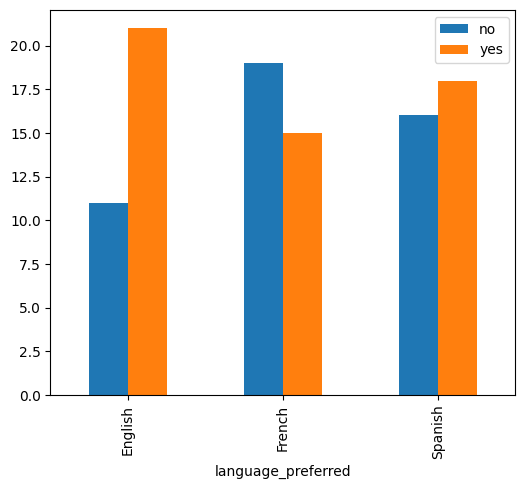

In [33]:
# Lets visualise the data
pd.crosstab(abtest["language_preferred"],abtest["converted"]).plot(kind="bar", figsize=(6,5))
plt.legend()
plt.show()

_Observation_: For English significantly more users converted, while French less users converted and Spanish slightly more converted

### Step 1: Let's write the null and alternative hypothesis


>$H_0:$ The conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ The conversion depends on preferred language.

### Step 2: Lets select the appropriate test
Since this is a test of dependence between two categorical variables, the Chi Square Test for Independence can be used

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each language is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

The significance level has been provided in the problem statement, we use $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [34]:
#prepare contigency table for the preferred languages by conversion
converted_language_table = pd.crosstab(abtest["converted"],abtest["language_preferred"])
converted_language_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [35]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(converted_language_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [26]:
if (p_value > 0.05):
    print("The p-value {} is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis".format(p_value))
else:
    print("The p-value {0} is less than the alpha 0.05. Therefore we reject the null hypothesis".format(p_value))

The p-value 0.21298887487543447 is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis


### Step 7:  Draw inference

As the p-value is greater than $\alpha$ at 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to conclude that the conversion rate is dependent on the preferred language

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis
Here, time spent is the response and language_preferred is the factor.

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


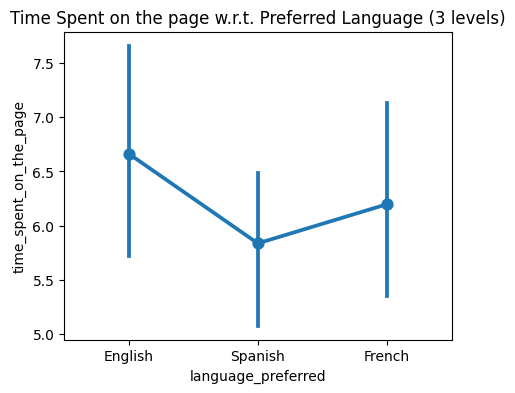

In [36]:
#get the new page data
abtest_new = abtest[abtest['landing_page'] == 'new']
# mean of time spent at different levels of the language preferred factor
print(abtest_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (5,4))
a = sns.pointplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = abtest_new)
a.set_title("Time Spent on the page w.r.t. Preferred Language (3 levels)", fontsize=12)
plt.show()

### Step 1: Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on landing page for languages Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the time spent is different from the rest.


### Step 2: Lets select the appropriate test
Since this is a test of equality of means from different populations, the One Way ANOVA test will be used

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Step 3: Decide the significance level

The significance level has been provided in the problem statement, we use $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [37]:
#SET THE new data for each level
new_english = abtest_new.loc[abtest_new['language_preferred'] == 'English', 'time_spent_on_the_page']
new_french = abtest_new.loc[abtest_new['language_preferred'] == 'French', 'time_spent_on_the_page']
new_spanish = abtest_new.loc[abtest_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page']


### Step 5: Calculate the p-value

In [38]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_english, new_french, new_spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [39]:
if (p_value > 0.05):
    print("The p-value {} is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis".format(p_value))
else:
    print("The p-value {0} is less than the alpha 0.05. Therefore we reject the null hypothesis".format(p_value))

The p-value 0.43204138694325955 is greater than the alpha 0.05. Therefore, we fail to reject the null hypothesis


### Step 7:  Draw inference

As the p-value is greater than the significance level, the null hypothesis of equality of all population means cannot be rejected.

Thus, we can say that the mean time spent on the new landing page is similar for the three different language users

## Conclusion and Business Recommendations

__Conclusions__:   
Basing on the evidence provided, statistically, it can be concluded that:
* The average time spent on a landing page is higher for those who converted than those who did not convert
* The users spend more time on the new page than the exisiting landing page
* The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page
* The conversion is independent of preferred language.
* The time spent on the new landing page is similar for the three different language

__Business Recommendations__:
* With higher conversion rate and time spent, the new page is very promising as it is more effective in capturing user interest and driving conversions. It is recommended for the business to consider investing more resources into the new landing page, such as enhancing its design, content, and functionality, to further improve its performance.
* The conclusions on preferred language imply that the landing page is effectively catering to users with different language preferences. The business can leverage on this insight to explore personalization opportunities, such as displaying content in the user's preferred language or tailoring the page's design to their cultural preferences.
* Since the average time spent on the new landing page is higher for converted users, it suggests that the content, layout, and user experience of the page are effective in engaging users and encouraging conversion. A further analysis of the elements of the new page that are driving higher engagement and conversion, is recommended so as to apply the insights gained to further optimize the new landing page

___